In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
#import data
data=pd.read_csv(r"C:\Users\Rohith Sanku\Desktop\Returns\dataset.csv")

In [45]:
#Data Pre-processing
#check null points 
data.isnull().sum()

orderID             0
orderDate           0
articleID           0
colorCode           0
sizeCode            0
productGroup      106
quantity            0
price               0
rrp               106
voucherID           3
voucherAmount       0
customerID          0
deviceID            0
paymentMethod       0
returnQuantity      0
dtype: int64

In [46]:
# Remove Null points
data=data.dropna()
print(data.isnull().sum())

orderID           0
orderDate         0
articleID         0
colorCode         0
sizeCode          0
productGroup      0
quantity          0
price             0
rrp               0
voucherID         0
voucherAmount     0
customerID        0
deviceID          0
paymentMethod     0
returnQuantity    0
dtype: int64


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048469 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   orderID         1048469 non-null  object 
 1   orderDate       1048469 non-null  object 
 2   articleID       1048469 non-null  object 
 3   colorCode       1048469 non-null  int64  
 4   sizeCode        1048469 non-null  object 
 5   productGroup    1048469 non-null  float64
 6   quantity        1048469 non-null  int64  
 7   price           1048469 non-null  float64
 8   rrp             1048469 non-null  float64
 9   voucherID       1048469 non-null  object 
 10  voucherAmount   1048469 non-null  int64  
 11  customerID      1048469 non-null  object 
 12  deviceID        1048469 non-null  int64  
 13  paymentMethod   1048469 non-null  object 
 14  returnQuantity  1048469 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 128.0+ MB


In [48]:
data.head(10)

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,1/1/2014,i1000382,1972,44,3.0,1,10.00,29.99,0,0,c1010575,2,BPRG,0
1,a1000001,1/1/2014,i1000550,3854,44,3.0,1,20.00,39.99,0,0,c1010575,2,BPRG,0
2,a1000002,1/1/2014,i1001991,2974,38,8.0,1,35.00,49.99,0,0,c1045905,4,BPRG,0
3,a1000002,1/1/2014,i1001999,1992,38,8.0,1,49.99,49.99,0,0,c1045905,4,BPRG,1
4,a1000003,1/1/2014,i1001942,1968,42,8.0,1,10.00,35.99,0,0,c1089295,2,PAYPALVC,0
5,a1000003,1/1/2014,i1001942,1972,42,8.0,1,10.00,35.99,0,0,c1089295,2,PAYPALVC,0
6,a1000003,1/1/2014,i1001974,1001,42,8.0,1,25.00,39.99,0,0,c1089295,2,PAYPALVC,0
7,a1000003,1/1/2014,i1001976,3976,44,8.0,1,15.00,39.99,0,0,c1089295,2,PAYPALVC,0
8,a1000003,1/1/2014,i1002392,2493,42,13.0,0,0.00,59.99,0,0,c1089295,2,PAYPALVC,0
9,a1000004,1/1/2014,i1002457,1001,42,14.0,1,89.99,89.99,0,0,c1050116,3,BPRG,1


In [49]:
# To check duplicates in dataset
print(data[data.duplicated()])

Empty DataFrame
Columns: [orderID, orderDate, articleID, colorCode, sizeCode, productGroup, quantity, price, rrp, voucherID, voucherAmount, customerID, deviceID, paymentMethod, returnQuantity]
Index: []


In [50]:
# converting required columns from object to Int64
data['articleID']=data['articleID'].str.replace(r'\D', '', regex=True)
data['articleID']=data['articleID'].astype('int64')
data['customerID']= data['customerID'].str.replace(r'\D','',regex=True)
data['customerID']=data['customerID'].astype('int64')

In [51]:
data.head(5)

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,a1000001,1/1/2014,1000382,1972,44,3.0,1,10.00,29.99,0,0,1010575,2,BPRG,0
1,a1000001,1/1/2014,1000550,3854,44,3.0,1,20.00,39.99,0,0,1010575,2,BPRG,0
2,a1000002,1/1/2014,1001991,2974,38,8.0,1,35.00,49.99,0,0,1045905,4,BPRG,0
3,a1000002,1/1/2014,1001999,1992,38,8.0,1,49.99,49.99,0,0,1045905,4,BPRG,1
4,a1000003,1/1/2014,1001942,1968,42,8.0,1,10.00,35.99,0,0,1089295,2,PAYPALVC,0


In [52]:
data['sizeCode'].unique()

array(['44', '38', '42', '40', '34', '36', '27', '32', 'I', '33', '29',
       '31', '28', '30', '26', 'A', '80', 'M', 'L', '25', '75', '100',
       '85', '90', '95', 'S', 'XL', 'XS'], dtype=object)

In [53]:
data['returnQuantity'].unique()

array([0, 1, 2, 4, 5, 3], dtype=int64)

In [54]:
#assigning numerical values for categorical ones in the sizeCode column
mapping={'I':19,'A':20,'XS':2,'S':6,'M':10,'L':14,'XL':18}
data['sizeCode']=data['sizeCode'].map(mapping).fillna(data['sizeCode'])

In [55]:
data['sizeCode'].unique()

array(['44', '38', '42', '40', '34', '36', '27', '32', 19.0, '33', '29',
       '31', '28', '30', '26', 20.0, '80', 10.0, 14.0, '25', '75', '100',
       '85', '90', '95', 6.0, 18.0, 2.0], dtype=object)

In [56]:
#converting sizeCode object to int 
data['sizeCode']=data['sizeCode'].astype('int64')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048469 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   orderID         1048469 non-null  object 
 1   orderDate       1048469 non-null  object 
 2   articleID       1048469 non-null  int64  
 3   colorCode       1048469 non-null  int64  
 4   sizeCode        1048469 non-null  int64  
 5   productGroup    1048469 non-null  float64
 6   quantity        1048469 non-null  int64  
 7   price           1048469 non-null  float64
 8   rrp             1048469 non-null  float64
 9   voucherID       1048469 non-null  object 
 10  voucherAmount   1048469 non-null  int64  
 11  customerID      1048469 non-null  int64  
 12  deviceID        1048469 non-null  int64  
 13  paymentMethod   1048469 non-null  object 
 14  returnQuantity  1048469 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 128.0+ MB


In [58]:
# Add new column to know the price of profit
data['price_difference'] = data['rrp'] - data['price']
result = data[['price_difference']].sum()
print(result)

price_difference    7869310.74
dtype: float64


In [59]:
data.head(10)

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,price_difference
0,a1000001,1/1/2014,1000382,1972,44,3.0,1,10.00,29.99,0,0,1010575,2,BPRG,0,19.99
1,a1000001,1/1/2014,1000550,3854,44,3.0,1,20.00,39.99,0,0,1010575,2,BPRG,0,19.99
2,a1000002,1/1/2014,1001991,2974,38,8.0,1,35.00,49.99,0,0,1045905,4,BPRG,0,14.99
3,a1000002,1/1/2014,1001999,1992,38,8.0,1,49.99,49.99,0,0,1045905,4,BPRG,1,0.00
4,a1000003,1/1/2014,1001942,1968,42,8.0,1,10.00,35.99,0,0,1089295,2,PAYPALVC,0,25.99
5,a1000003,1/1/2014,1001942,1972,42,8.0,1,10.00,35.99,0,0,1089295,2,PAYPALVC,0,25.99
6,a1000003,1/1/2014,1001974,1001,42,8.0,1,25.00,39.99,0,0,1089295,2,PAYPALVC,0,14.99
7,a1000003,1/1/2014,1001976,3976,44,8.0,1,15.00,39.99,0,0,1089295,2,PAYPALVC,0,24.99
8,a1000003,1/1/2014,1002392,2493,42,13.0,0,0.00,59.99,0,0,1089295,2,PAYPALVC,0,59.99
9,a1000004,1/1/2014,1002457,1001,42,14.0,1,89.99,89.99,0,0,1050116,3,BPRG,1,0.00


In [60]:
print(len(data['articleID'].unique()))
print(len(data['sizeCode'].unique()))
print(len(data['colorCode'].unique()))
print(len(data['customerID'].unique()))
print(len(data['paymentMethod'].unique()))

2326
28
314
174799
9


In [61]:
# data without returns
data_wor= data[data['returnQuantity']==0]
data_wor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506439 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   orderID           506439 non-null  object 
 1   orderDate         506439 non-null  object 
 2   articleID         506439 non-null  int64  
 3   colorCode         506439 non-null  int64  
 4   sizeCode          506439 non-null  int64  
 5   productGroup      506439 non-null  float64
 6   quantity          506439 non-null  int64  
 7   price             506439 non-null  float64
 8   rrp               506439 non-null  float64
 9   voucherID         506439 non-null  object 
 10  voucherAmount     506439 non-null  int64  
 11  customerID        506439 non-null  int64  
 12  deviceID          506439 non-null  int64  
 13  paymentMethod     506439 non-null  object 
 14  returnQuantity    506439 non-null  int64  
 15  price_difference  506439 non-null  float64
dtypes: float64(4), int6

In [62]:
# data with returns
data_wr=data[data['returnQuantity']>=1]
data_wr

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity,price_difference
3,a1000002,1/1/2014,1001999,1992,38,8.0,1,49.99,49.99,0,0,1045905,4,BPRG,1,0.00
9,a1000004,1/1/2014,1002457,1001,42,14.0,1,89.99,89.99,0,0,1050116,3,BPRG,1,0.00
10,a1000005,1/1/2014,1000366,1968,42,3.0,1,15.00,39.99,0,0,1089296,2,BPRG,1,24.99
11,a1000005,1/1/2014,1000406,3972,40,3.0,1,10.00,29.99,0,0,1089296,2,BPRG,1,19.99
12,a1000005,1/1/2014,1000406,3972,42,3.0,1,10.00,29.99,0,0,1089296,2,BPRG,1,19.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048565,a1333771,10/26/2014,1000877,3001,44,3.0,1,8.00,27.99,0,0,1079778,2,BPRG,1,19.99
1048566,a1333771,10/26/2014,1000933,1001,44,3.0,1,20.00,29.99,0,0,1079778,2,BPRG,1,9.99
1048567,a1333771,10/26/2014,1003417,7038,34,2.0,1,30.00,59.99,0,0,1079778,2,BPRG,1,29.99
1048572,a1333773,10/26/2014,1000969,1012,40,3.0,1,25.99,25.99,0,0,1201637,3,BPRG,1,0.00


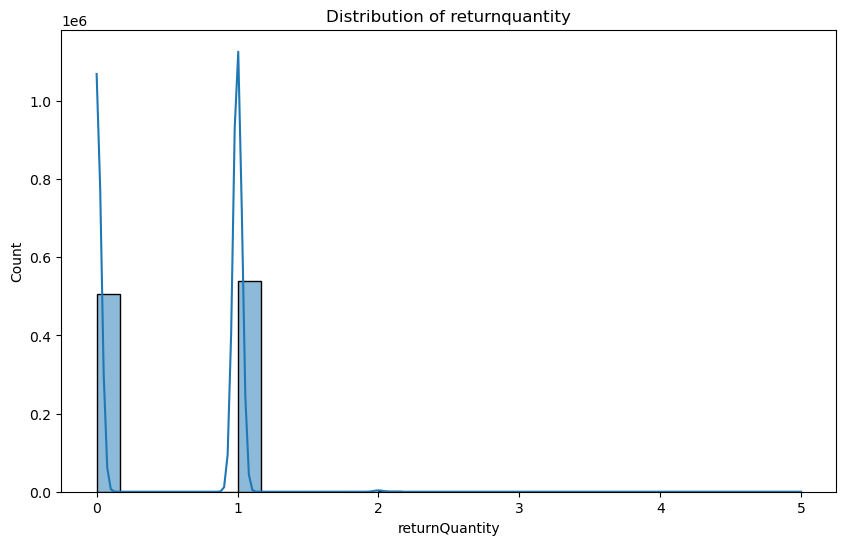

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(data['returnQuantity'], bins=30, kde=True)
plt.title('Distribution of returnquantity')
plt.xlabel('returnQuantity')
plt.show()

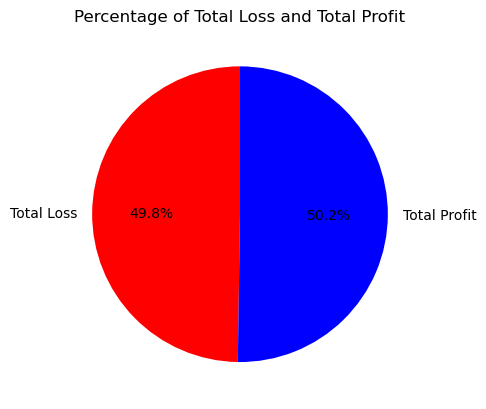

In [64]:
loss_profit = data_wr['price_difference'].sum()
profit_gain = data_wor['price_difference'].sum()

# Data for the bar chart
labels = ['Total Loss', 'Total Profit']
sizes = [loss_profit, profit_gain]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['red', 'blue'], startangle=90)

# Add title
plt.title('Percentage of Total Loss and Total Profit')

# Show the plot
plt.show()

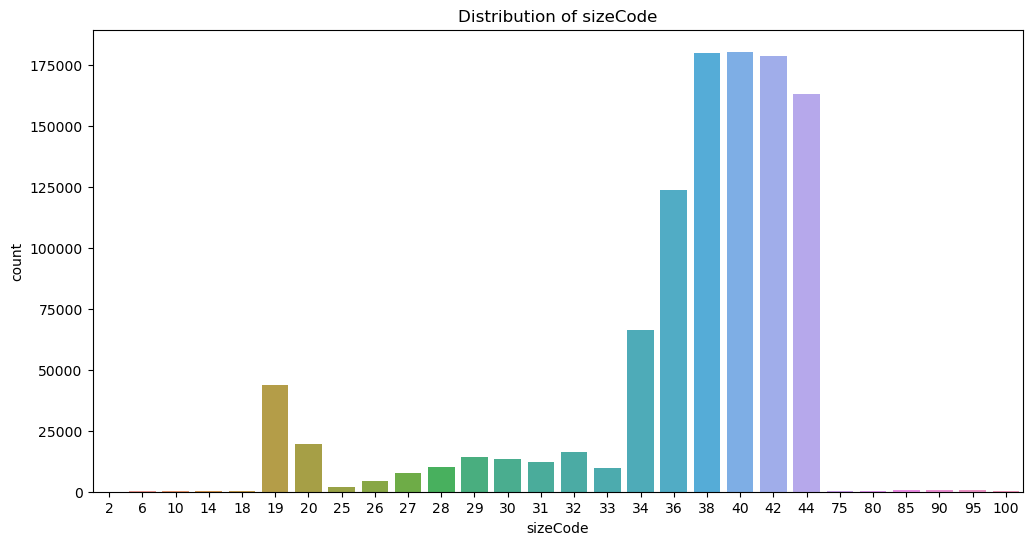

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sizeCode', data=data)
plt.title('Distribution of sizeCode')
plt.show()

C:\Users\Rohith Sanku\AppData\Local\Temp\ipykernel_10204\79961934.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


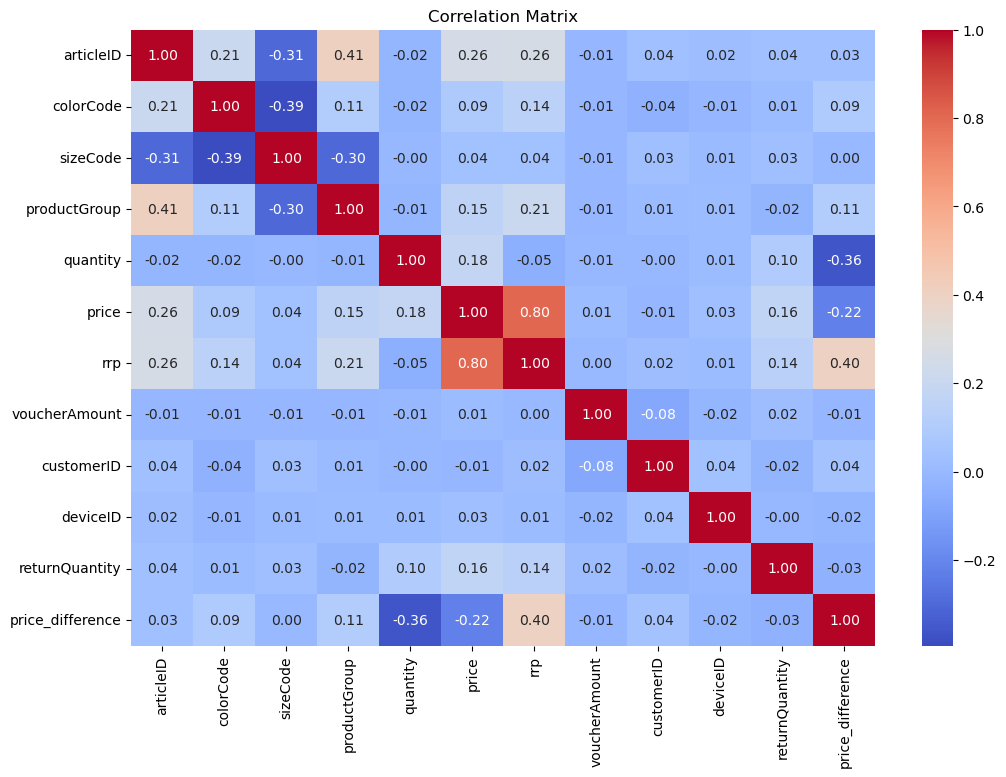

In [66]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [67]:
# By above correlation matrix we find postive correlation towards returnQuantity by customerid, sizecode,articleid,colorcode
#Now we using pair plots to visualize relationships between pairs of variables.
#sns.pairplot(data[['customerID', 'sizeCode', 'articleID', 'colorCode', 'returnQuantity']])
#plt.show()


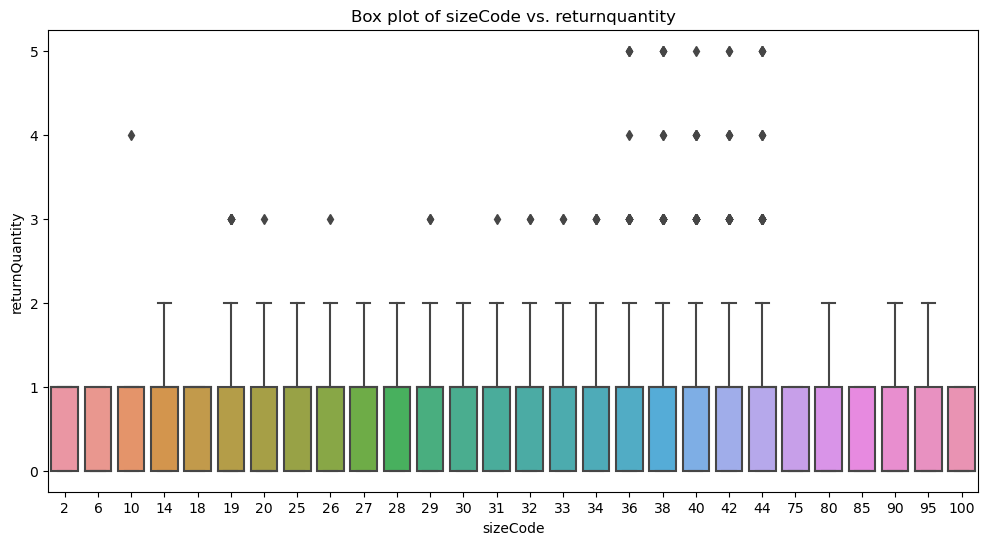

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sizeCode', y='returnQuantity', data=data)
plt.title('Box plot of sizeCode vs. returnquantity')
plt.show()

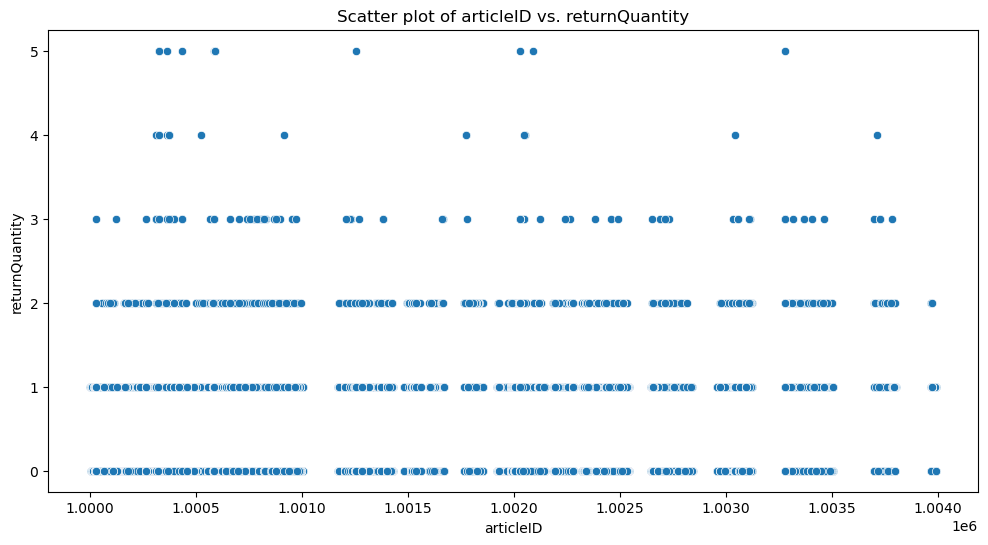

In [69]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='articleID', y='returnQuantity', data=data)
plt.title('Scatter plot of articleID vs. returnQuantity')
plt.show()


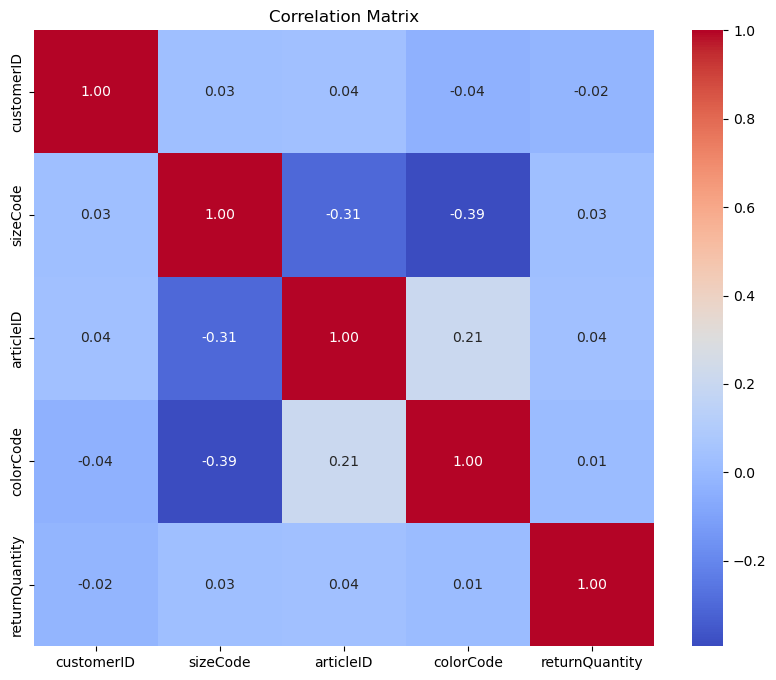

In [70]:
correlation_matrix = data[['customerID', 'sizeCode', 'articleID', 'colorCode', 'returnQuantity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [71]:
# based above corrleation and analysis we select articleid , size code and color code to predict returnquantity
X = data[['articleID','sizeCode','colorCode','price','quantity']]
y = data['returnQuantity']

y_binary = y.map(lambda x: 0 if x == 0 else 1)
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_pred_train = logistic_model.predict(X_train_scaled)
logistic_pred_test = logistic_model.predict(X_test_scaled)
logistic_accuracy_train = accuracy_score(y_train, logistic_pred_train)
logistic_accuracy_test = accuracy_score(y_test, logistic_pred_test)
print(f"Logistic Regression Training Accuracy: {logistic_accuracy_train}")
print(f"Logistic Regression Testing Accuracy: {logistic_accuracy_test}")

Logistic Regression Training Accuracy: 0.5790569351345646
Logistic Regression Testing Accuracy: 0.5783349483820264


In [76]:
# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
random_forest_pred_train = random_forest_model.predict(X_train_scaled)
random_forest_pred_test = random_forest_model.predict(X_test_scaled)
random_forest_accuracy_train = accuracy_score(y_train, random_forest_pred_train)
random_forest_accuracy_test = accuracy_score(y_test, random_forest_pred_test)


print(f"Random Forest Training Accuracy: {random_forest_accuracy_train}")
print(f"Random Forest Testing Accuracy: {random_forest_accuracy_test}")

Random Forest Training Accuracy: 0.6594447009032862
Random Forest Testing Accuracy: 0.5942895947626642


In [78]:
# XGBoost
# XGBoost Model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train_scaled, y_train)
xgboost_pred_train = xgboost_model.predict(X_train_scaled)
xgboost_pred_test = xgboost_model.predict(X_test_scaled)
xgboost_accuracy_train = accuracy_score(y_train, xgboost_pred_train)
xgboost_accuracy_test = accuracy_score(y_test, xgboost_pred_test)


print(f"XGBoost Training Accuracy: {xgboost_accuracy_train}")
print(f"XGBoost Testing Accuracy: {xgboost_accuracy_test}")

XGBoost Training Accuracy: 0.6149225981781673
XGBoost Testing Accuracy: 0.6092942873057172


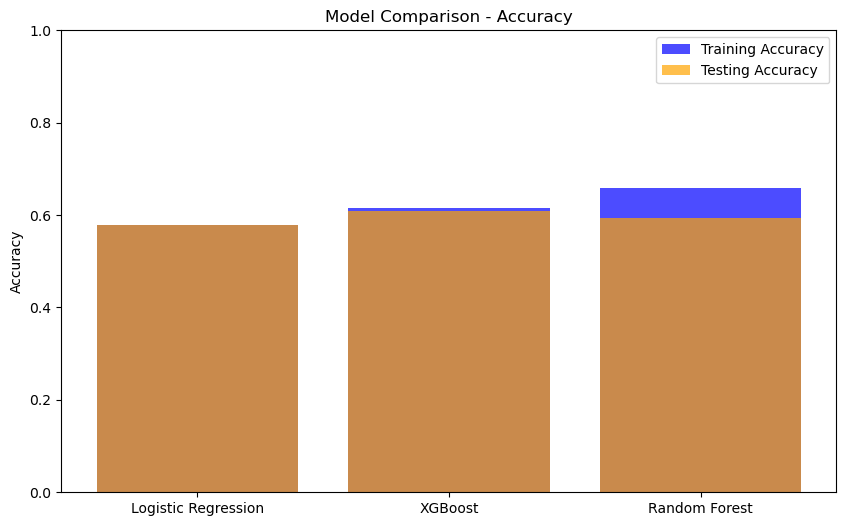

In [79]:

models = ['Logistic Regression', 'XGBoost', 'Random Forest']
accuracies_train = [logistic_accuracy_train, xgboost_accuracy_train, random_forest_accuracy_train]
accuracies_test = [logistic_accuracy_test, xgboost_accuracy_test, random_forest_accuracy_test]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies_train, color='blue', alpha=0.7, label='Training Accuracy')
plt.bar(models, accuracies_test, color='orange', alpha=0.7, label='Testing Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.legend()
plt.show()


C:\Users\Rohith Sanku\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


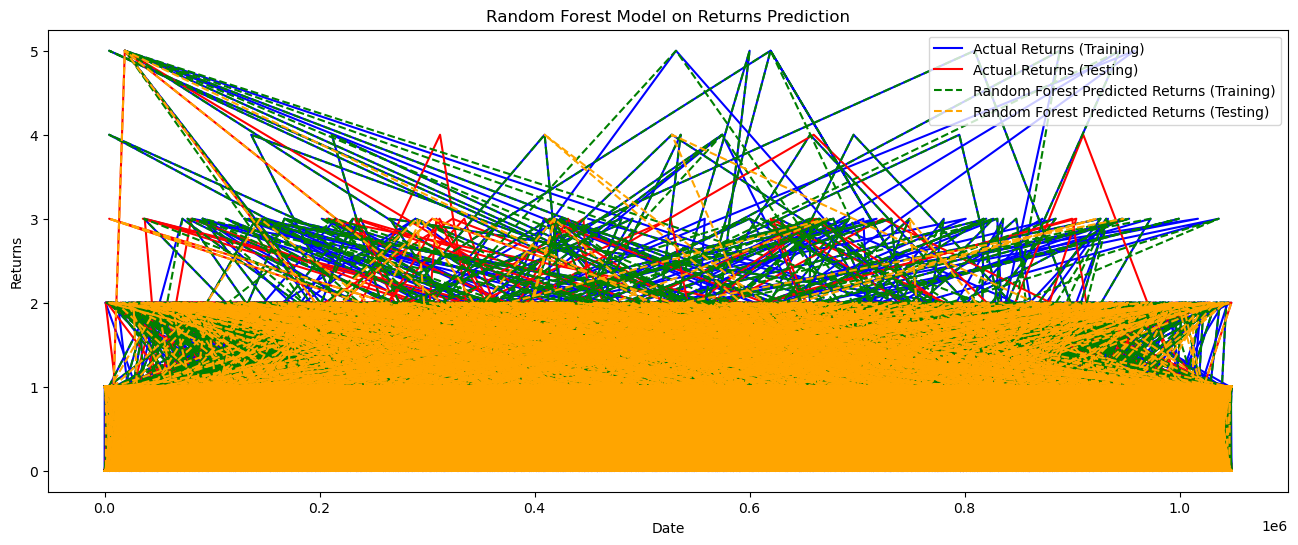

In [84]:
plt.figure(figsize=(16, 6))
plt.rcParams['agg.path.chunksize'] = 200
plt.title('Random Forest Model on Returns Prediction')
plt.plot(y_train.index, y_train, color='blue', label='Actual Returns (Training)')
plt.plot(y_test.index, y_test, color='red', label='Actual Returns (Testing)')
plt.plot(y_train.index, random_forest_pred_train, color='green', linestyle='dashed', label='Random Forest Predicted Returns (Training)')
plt.plot(y_test.index, random_forest_pred_test, color='orange', linestyle='dashed', label='Random Forest Predicted Returns (Testing)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()